# Ecommerce - Classification Analysis

## Overview

- [Description](#Description)  
- [Data Description](#Data-Description)
- [Data Preparation](#Data-Preparation)
- [Binary Classification](#Binary-Classification)  
    - [NAIVE BAYES CLASSIFICATION](#NAIVE-BAYES-CLASSIFICATION)
    - [K-NEAREST NEIGHBOR](#K-NEAREST-NEIGHBOR)
    - [PERCEPTRON](#PERCEPTRON)
    - [LOGISTIC REGRESSION](#LOGISTIC-REGRESSION)

## Description

Our objective is to predict user actions on our ecommerce site. Examples of direct monetary impact by user actions are:
- Predict bounce (see [Bounce rate](https://en.wikipedia.org/wiki/Bounce_rate)) - we can show them a pop up and prompt them to convert or do some action other than leaving your site.
- Discover which areas of the site are weak.
- Detect user-friendliness in some platforms (example mobile platform).
- Make data-driven decisions.
- Improve user experience.

## Data Description

Columns:
- **is_mobile** (0/1). Binary feature
- **n_products_viewed** (int >=0). Numerical feature
- **visit_duration** (real >=0). Numerical feature
- **is_returning_visitor** (0/1). Binary feature
- **time_of_day** (0/1/2/3 = 24h split into 4 categories). Categorical feature
- **user_action** (bounce / add_to_cart / begin_checkout / finish_checkout). Target
    - bounce (0): the user just left your site
    - add_to_cart (1): the user added to their card but did not begin the checkout process
    - begin_checkout (2): the user started the checkout process but never completed it
    - finish_checkout (3): the user paid and we have a successful order

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/ecommerce_data.csv')

In [2]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [3]:
df.dtypes

is_mobile                 int64
n_products_viewed         int64
visit_duration          float64
is_returning_visitor      int64
time_of_day               int64
user_action               int64
dtype: object

## Data Preparation

- Checking Missing Data (see [Missing Data](../../00 Data Preparation/01_Missing Data.ipynb))
- Feature scaling (see [Feature Scaling](../../00 Data Preparation/03_Feature_Scaling.ipynb))(necessary for some classification algorithms)
- One-hot-encoding for categorical data (see [Categorical Data](../../00 Data Preparation/02_Categorical Data.ipynb))

In [4]:
df.describe()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.486000,0.854000,1.055880,0.518000,1.588000,0.74800
std,0.500305,1.046362,0.976711,0.500176,1.121057,0.89336
min,0.000000,0.000000,0.000141,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.328550,0.000000,1.000000,0.00000
50%,0.000000,1.000000,0.804717,1.000000,2.000000,0.00000
75%,1.000000,1.000000,1.499518,1.000000,3.000000,1.00000
max,1.000000,4.000000,6.368775,1.000000,3.000000,3.00000


In [5]:
df.isnull().sum()

is_mobile               0
n_products_viewed       0
visit_duration          0
is_returning_visitor    0
time_of_day             0
user_action             0
dtype: int64

In [6]:
for column in df.columns:
    print(column)
    print('----------------')
    print(df[column].value_counts())
    print('\n')

is_mobile
----------------
0    257
1    243
Name: is_mobile, dtype: int64


n_products_viewed
----------------
0    240
1    153
2     62
3     30
4     15
Name: n_products_viewed, dtype: int64


visit_duration
----------------
3.211422    1
0.720206    1
0.272298    1
1.387943    1
3.369352    1
0.465946    1
1.724702    1
0.851933    1
3.806308    1
0.597065    1
0.454992    1
0.707463    1
0.308415    1
0.350968    1
0.143695    1
0.355265    1
1.480493    1
0.091978    1
0.479018    1
1.112894    1
2.046040    1
0.728014    1
0.878761    1
0.564505    1
1.075602    1
0.076742    1
0.359318    1
2.378410    1
0.032269    1
0.571083    1
           ..
1.113962    1
1.176730    1
6.089099    1
2.013423    1
0.166900    1
1.678533    1
1.457982    1
0.572542    1
0.984629    1
0.018690    1
0.866789    1
1.509405    1
0.329477    1
0.603154    1
0.424030    1
0.046689    1
0.303757    1
0.569088    1
3.428653    1
0.573198    1
0.652474    1
2.266245    1
1.664271    1
1.391700    1
3

In [7]:
y = df[['user_action']]
X = df.drop(labels=['user_action'], axis=1)

In [8]:
y.head()

,user_action
0,0
1,1
2,0
3,2
4,2


In [9]:
X.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day
0,1,0,0.657510,0,3
1,1,1,0.568571,0,2
2,1,0,0.042246,1,1
3,1,1,1.659793,1,1
4,0,1,2.014745,1,1


### Normalization

In [10]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler(with_mean=True, with_std=True)

features_to_scale = ['n_products_viewed','visit_duration']

Xscaled = sd.fit_transform(X[features_to_scale])
X[features_to_scale].describe()

,n_products_viewed,visit_duration
count,500.000000,500.000000
mean,0.854000,1.055880
std,1.046362,0.976711
min,0.000000,0.000141
25%,0.000000,0.328550
50%,1.000000,0.804717
75%,1.000000,1.499518
max,4.000000,6.368775


In [11]:
X = X.drop(labels=features_to_scale, axis=1)

for idx, feature in enumerate(features_to_scale):
    X[feature] = Xscaled[:, idx]

X[features_to_scale].describe()

,n_products_viewed,visit_duration
count,5.000000e+02,5.000000e+02
mean,-9.414691e-17,-3.286260e-17
std,1.001002e+00,1.001002e+00
min,-8.169784e-01,-1.081995e+00
25%,-8.169784e-01,-7.454186e-01
50%,1.396708e-01,-2.574098e-01
75%,1.396708e-01,4.546714e-01
max,3.009618e+00,5.445026e+00


In [12]:
X.head()

,is_mobile,is_returning_visitor,time_of_day,n_products_viewed,visit_duration
0,1,0,3,-0.816978,-0.408278
1,1,0,2,0.139671,-0.499428
2,1,1,1,-0.816978,-1.038843
3,1,1,1,0.139671,0.618932
4,0,1,1,0.139671,0.982712


### One-Hot-Encoding

In [13]:
X = pd.get_dummies(X, columns=['time_of_day'])
X.head()

,is_mobile,is_returning_visitor,n_products_viewed,visit_duration,time_of_day_0,time_of_day_1,time_of_day_2,time_of_day_3
0,1,0,-0.816978,-0.408278,0,0,0,1
1,1,0,0.139671,-0.499428,0,0,1,0
2,1,1,-0.816978,-1.038843,0,1,0,0
3,1,1,0.139671,0.618932,0,1,0,0
4,0,1,0.139671,0.982712,0,1,0,0


### Visualizing the Dataset

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['legend.fontsize'] = 10

#### Parallel Coordinates

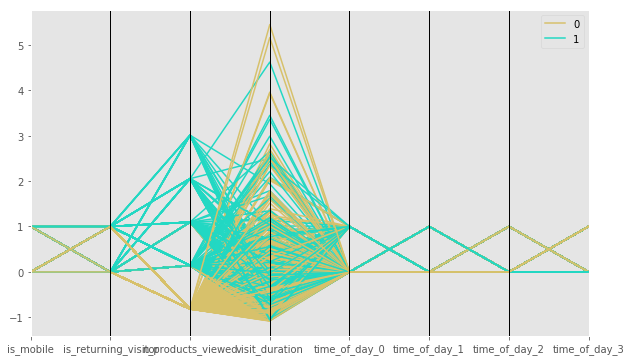

In [15]:
from pandas.tools.plotting import parallel_coordinates

dataset = X.copy()

# adding the target for a binary classification:
# 0: user bounces
# 1: user doesn't bounce
dataset['target'] = y['user_action'].apply(lambda x: 1 if x>0 else 0)

parallel_coordinates(dataset, 'target')

####  RadViz

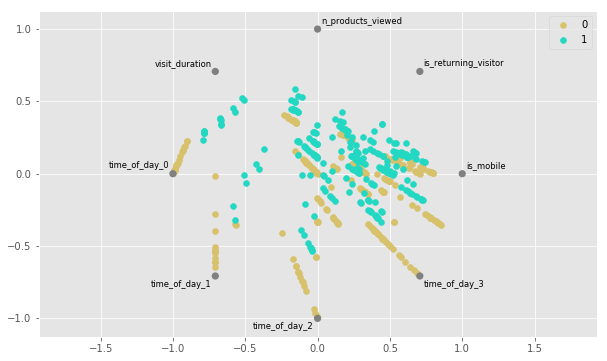

In [16]:
from pandas.tools.plotting import radviz

radviz(dataset, 'target')

## Binary Classification

First we are going to perfom a **binary classification** for the bounce user action. In this case we are going to convert the actions 'add_to_cart', 'begin_checkout', and 'finish_checkout' in a non-bounce action. So we are going to classify data as:
- y=0 if user bounces
- y=1 if user doesn't bounce

In [17]:
y['user_action'].value_counts()

0    253
1    145
2     77
3     25
Name: user_action, dtype: int64

In [18]:
y = y['user_action'].apply(lambda x: 1 if x>0 else 0)
y.value_counts()

0    253
1    247
Name: user_action, dtype: int64

In [19]:
# Convert the dataset and targets to a numpy array
X = X.values
y = y.values

### Splitting the Dataset in a Training a Test Set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=7)

### Using PCA for Visualization Purposes

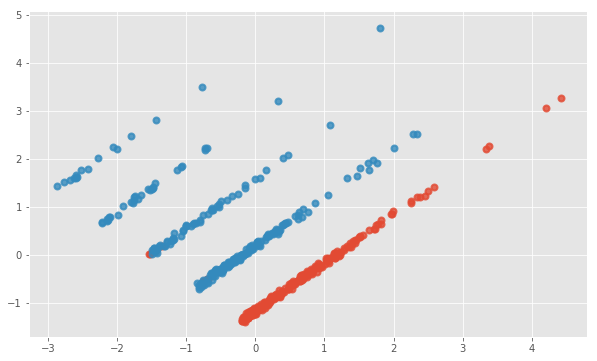

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

X_r = pca.transform(X)

colors = ['navy', 'darkorange']

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_r[y==i,0], X_r[y==i,1], alpha=.8, lw=2)

### NAIVE BAYES CLASSIFICATION
See [Naive Bayes Classification](../../02 Classification/00 Naive Bayes Classification.ipynb) explanation.

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()
accuracies = cross_val_score(estimator=gnb, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             n_jobs=-1)

In [23]:
print('Mean Accuracy: {0}'.format(accuracies.mean()))
print('Standard Deviation Accuracies: {0}'.format(accuracies.std()))
print('Mean Score and 95 confidence interval: %0.2f (+/- %0.2f)' % (accuracies.mean(), accuracies.std() * 2))

Mean Accuracy: 0.974926516572858
Standard Deviation Accuracies: 0.025014790528671428
Mean Score and 95 confidence interval: 0.97 (+/- 0.05)


In [24]:
gnb.fit(X_train, y_train)
print('Accuracy: {0}'.format(gnb.score(X_test, y_test)))
y_pred = gnb.predict(X_test)
print('Number of mislabeled points: {0} of {1}'.format((y_test!=y_pred).sum(), y_test.size))

Accuracy: 0.96
Number of mislabeled points: 4 of 100


### K-NEAREST NEIGHBOR
See [K-Nearest Neighbor](../../02 Classification/01 K-Nearest Neighbor Classification.ipynb) explanation.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [5, 10, 15]}

knn = KNeighborsClassifier()
knn_gsv = GridSearchCV(estimator=knn, 
                   param_grid=parameters, 
                   cv=10,
                   scoring='accuracy')

knn_gsv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [26]:
print('Best parameters: {0}'.format(knn_gsv.best_params_))
print('Best accuracy: {0}'.format(knn_gsv.best_score_))

Best parameters: {'n_neighbors': 15}
Best accuracy: 0.9625


In [45]:
knn_gsv.grid_scores_

/Volumes/MacintoshDATA/softdevelopmentbcn/miniconda2/envs/dspy3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.95000, std: 0.04424, params: {'n_neighbors': 5},
 mean: 0.93250, std: 0.04123, params: {'n_neighbors': 10},
 mean: 0.96250, std: 0.03967, params: {'n_neighbors': 15}]

In [46]:
knn_gsv.cv_results_

{'mean_fit_time': array([ 0.00168788,  0.00114672,  0.00102208]),
 'mean_score_time': array([ 0.00321989,  0.00182757,  0.00187213]),
 'mean_test_score': array([ 0.95  ,  0.9325,  0.9625]),
 'mean_train_score': array([ 0.98444665,  0.95638013,  0.96638327]),
 'param_n_neighbors': masked_array(data = [5 10 15],
              mask = [False False False],
        fill_value = ?),
 'params': ({'n_neighbors': 5}, {'n_neighbors': 10}, {'n_neighbors': 15}),
 'rank_test_score': array([2, 3, 1], dtype=int32),
 'split0_test_score': array([ 1.        ,  0.92682927,  0.95121951]),
 'split0_train_score': array([ 0.98328691,  0.95264624,  0.95821727]),
 'split1_test_score': array([ 0.97560976,  1.        ,  1.        ]),
 'split1_train_score': array([ 0.99164345,  0.94150418,  0.95821727]),
 'split2_test_score': array([ 0.97560976,  0.97560976,  1.        ]),
 'split2_train_score': array([ 0.98328691,  0.95821727,  0.96657382]),
 'split3_test_score': array([ 0.92682927,  0.90243902,  0.92682927]),
 '

In [37]:
print('Accuracy: {0}'.format(knn_gsv.score(X_test, y_test)))
y_pred = knn_gsv.predict(X_test)
print('Number of mislabeled points: {0} of {1}'.format((y_test!=y_pred).sum(), y_test.size))

Accuracy: 0.94
Number of mislabeled points: 6 of 100


### PERCEPTRON
See [Perceptron](../../02 Classification/02 Perceptron Classification.ipynb) explanation.

In [31]:
from sklearn.linear_model import Perceptron

parameters = {'n_iter': [40, 60, 100],
              'eta0':[0.01, 0.1],
              'penalty':[None, 'l2','l1'],
              'alpha':[0.0001, 0.001, 0.01, 0.1]
             }

ppn = Perceptron(random_state=0)
ppn_gsv = GridSearchCV(estimator=ppn, 
                   param_grid=parameters, 
                   cv=10,
                   scoring='accuracy')

ppn_gsv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1], 'n_iter': [40, 60, 100], 'eta0': [0.01, 0.1], 'penalty': [None, 'l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [33]:
print('Best parameters: {0}'.format(ppn_gsv.best_params_))
print('Best accuracy: {0}'.format(ppn_gsv.best_score_))

Best parameters: {'alpha': 0.001, 'n_iter': 40, 'eta0': 0.01, 'penalty': 'l1'}
Best accuracy: 0.95


In [35]:
ppn_gsv.grid_scores_

/Volumes/MacintoshDATA/softdevelopmentbcn/miniconda2/envs/dspy3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93250, std: 0.05627, params: {'alpha': 0.0001, 'n_iter': 40, 'eta0': 0.01, 'penalty': None},
 mean: 0.94000, std: 0.06243, params: {'alpha': 0.0001, 'n_iter': 40, 'eta0': 0.01, 'penalty': 'l2'},
 mean: 0.92750, std: 0.08070, params: {'alpha': 0.0001, 'n_iter': 40, 'eta0': 0.01, 'penalty': 'l1'},
 mean: 0.92500, std: 0.05137, params: {'alpha': 0.0001, 'n_iter': 60, 'eta0': 0.01, 'penalty': None},
 mean: 0.92750, std: 0.05701, params: {'alpha': 0.0001, 'n_iter': 60, 'eta0': 0.01, 'penalty': 'l2'},
 mean: 0.93000, std: 0.06956, params: {'alpha': 0.0001, 'n_iter': 60, 'eta0': 0.01, 'penalty': 'l1'},
 mean: 0.92000, std: 0.04285, params: {'alpha': 0.0001, 'n_iter': 100, 'eta0': 0.01, 'penalty': None},
 mean: 0.92500, std: 0.03499, params: {'alpha': 0.0001, 'n_iter': 100, 'eta0': 0.01, 'penalty': 'l2'},
 mean: 0.92000, std: 0.07661, params: {'alpha': 0.0001, 'n_iter': 100, 'eta0': 0.01, 'penalty': 'l1'},
 mean: 0.93250, std: 0.05627, params: {'alpha': 0.0001, 'n_iter': 40, 'eta0': 0

In [47]:
ppn_gsv.cv_results_

{'mean_fit_time': array([ 0.01166284,  0.00138059,  0.00196033,  0.00169778,  0.00226738,
         0.0027396 ,  0.0021548 ,  0.00251961,  0.00328808,  0.00143313,
         0.00132098,  0.00200288,  0.00171213,  0.00173392,  0.00262408,
         0.00218117,  0.00275073,  0.00382144,  0.0015131 ,  0.0015348 ,
         0.00212409,  0.00176067,  0.00181315,  0.00255373,  0.00269265,
         0.00295858,  0.00360527,  0.00151515,  0.00151348,  0.00327582,
         0.00248818,  0.00215099,  0.00252986,  0.00257242,  0.00266573,
         0.00351691,  0.00144989,  0.00147088,  0.00179989,  0.00168619,
         0.00213499,  0.00251551,  0.00238481,  0.00299294,  0.00349965,
         0.00140162,  0.00158412,  0.0018471 ,  0.00165811,  0.0018676 ,
         0.00210855,  0.0023747 ,  0.0035135 ,  0.00687833,  0.00145338,
         0.00146301,  0.00191367,  0.00180924,  0.00190082,  0.00281453,
         0.00249398,  0.00294781,  0.00354872,  0.00138361,  0.00131452,
         0.00211258,  0.00162559, 

In [36]:
print('Accuracy: {0}'.format(ppn_gsv.score(X_test, y_test)))
y_pred = ppn_gsv.predict(X_test)
print('Number of mislabeled points: {0} of {1}'.format((y_test!=y_pred).sum(), y_test.size))

Accuracy: 0.96
Number of mislabeled points: 4 of 100


### LOGISTIC REGRESSION
See [Logistic Regression](../../02 Classification/03 Logistic Regression.ipynb) explanation.

In [40]:
from sklearn.linear_model import LogisticRegression

parameters = {'max_iter': [40, 60, 100, 500],
              'tol':[0.0001, 0.001, 0.01],
              'penalty':['l2','l1'],
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10]
             }

lr = LogisticRegression()
lr_gsv = GridSearchCV(estimator=lr, 
                   param_grid=parameters, 
                   cv=10,
                   scoring='accuracy')

lr_gsv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_iter': [40, 60, 100, 500], 'tol': [0.0001, 0.001, 0.01], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [41]:
print('Best parameters: {0}'.format(lr_gsv.best_params_))
print('Best accuracy: {0}'.format(lr_gsv.best_score_))

Best parameters: {'max_iter': 40, 'tol': 0.0001, 'penalty': 'l2', 'C': 10}
Best accuracy: 0.9825


In [42]:
lr_gsv.grid_scores_

/Volumes/MacintoshDATA/softdevelopmentbcn/miniconda2/envs/dspy3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97500, std: 0.02501, params: {'max_iter': 40, 'tol': 0.0001, 'penalty': 'l2', 'C': 0.0001},
 mean: 0.97500, std: 0.02501, params: {'max_iter': 40, 'tol': 0.001, 'penalty': 'l2', 'C': 0.0001},
 mean: 0.97500, std: 0.02501, params: {'max_iter': 40, 'tol': 0.01, 'penalty': 'l2', 'C': 0.0001},
 mean: 0.51000, std: 0.00501, params: {'max_iter': 40, 'tol': 0.0001, 'penalty': 'l1', 'C': 0.0001},
 mean: 0.51000, std: 0.00501, params: {'max_iter': 40, 'tol': 0.001, 'penalty': 'l1', 'C': 0.0001},
 mean: 0.51000, std: 0.00501, params: {'max_iter': 40, 'tol': 0.01, 'penalty': 'l1', 'C': 0.0001},
 mean: 0.97500, std: 0.02501, params: {'max_iter': 60, 'tol': 0.0001, 'penalty': 'l2', 'C': 0.0001},
 mean: 0.97500, std: 0.02501, params: {'max_iter': 60, 'tol': 0.001, 'penalty': 'l2', 'C': 0.0001},
 mean: 0.97500, std: 0.02501, params: {'max_iter': 60, 'tol': 0.01, 'penalty': 'l2', 'C': 0.0001},
 mean: 0.51000, std: 0.00501, params: {'max_iter': 60, 'tol': 0.0001, 'penalty': 'l1', 'C': 0.0001},

In [43]:
print('Accuracy: {0}'.format(lr_gsv.score(X_test, y_test)))
y_pred = lr_gsv.predict(X_test)
print('Number of mislabeled points: {0} of {1}'.format((y_test!=y_pred).sum(), y_test.size))

Accuracy: 0.96
Number of mislabeled points: 4 of 100
